# Эксперимент по классификации данных из датасета MNIST при помощи спайковых нейронных сетей

In [ ]:
from brian2 import *
import os
from struct import unpack 
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [74]:
X, y = fetch_openml('mnist_784', return_X_y = True, as_frame = False)

WARNING    /home/user1/.local/lib/python3.8/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
 [py.warnings]


In [106]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (28, 28)))
    plt.text(0, 27, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')

### Выбор номер изображения из датасета

In [ ]:
number = 0

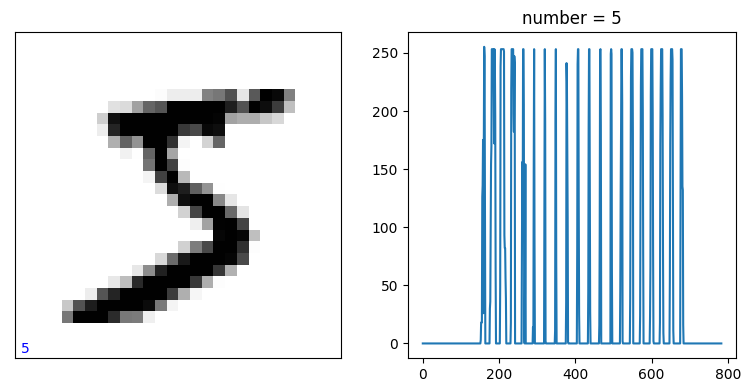

In [320]:
plt.figure(figsize = (50, 50))
plt.subplot(10, 10, 1)
draw_digit(X[number, :], y[number])
plt.subplot(10, 10, 2)
plt.title(f"number = {y[number]}")
plt.plot(time, X[0, :])

In [321]:
image = np.array(np.split(X[number, :],28))

# Сборка сети и тестовое обучение

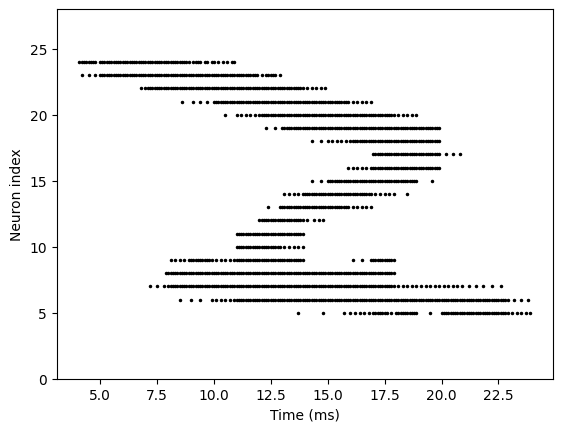

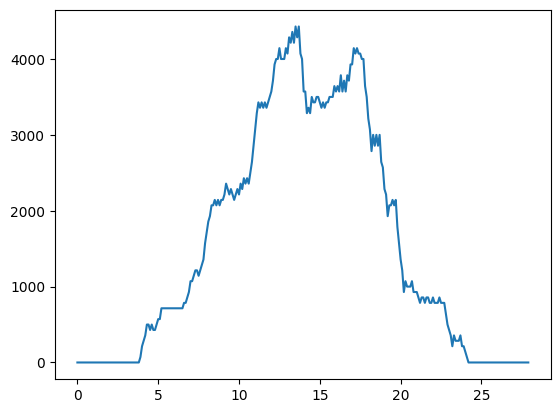

In [338]:
start_scope()
from matplotlib.image import imread
img = image.T
num_samples, N = img.shape
ta = TimedArray(img, dt=1*ms) # 228
A = 1.5
tau = 2*ms

eqs = '''
dv/dt = (A*ta(t, i)-v)/tau+0.8*xi*tau**-0.5 : 1
'''
G = NeuronGroup(N, eqs, threshold='v>10', reset='v=0', method='euler')

Mlfp = StateMonitor(G,'v',record=True)

LFP = PopulationRateMonitor(G)
# G.v = v 
M = SpikeMonitor(G)
run(num_samples*ms)


# subplot(111)
plot(M.t/ms, M.i, '.k', ms=3)
# xlim(0, num_samples)
ylim(0, N)
xlabel('Time (ms)')
ylabel('Neuron index')
plt.show()
# subplot(111)
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)

# Добавлено уравнение Е.Ижикевича 

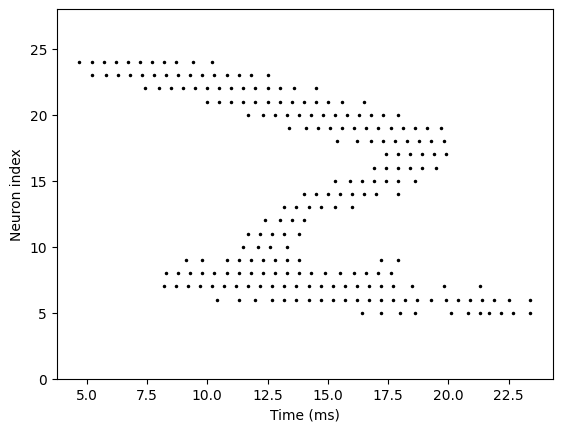

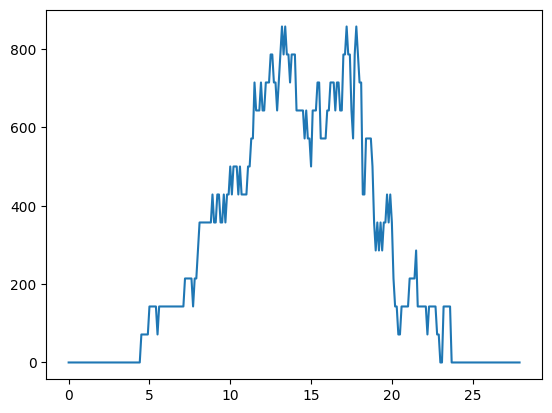

In [340]:
start_scope()
from matplotlib.image import imread
img = image.T
num_samples, N = img.shape
ta = TimedArray(img, dt=1*ms) # 228

A = 1.5
tau = 2*ms

taum = 10*ms
Ee = 0
vt = -54
vr = -60
El = -74
taue = 5*ms

eqs = '''
        dv/dt = (ge * (Ee-vr) + ta(t, i) - v) / taum : 1
        dge/dt = -ge / taue                          : 1
      '''

G = NeuronGroup(N, eqs, threshold='v>10', reset='v=0', method='euler')

Mlfp = StateMonitor(G,'v',record=True)

LFP = PopulationRateMonitor(G)
M = SpikeMonitor(G)
run(num_samples*ms)


plot(M.t/ms, M.i, '.k', ms=3)
ylim(0, N)
xlabel('Time (ms)')
ylabel('Neuron index')
plt.show()
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)

# STDP

WARNING    'synapses_1' has been included in the network but not the object on which it depends.Setting 'synapses_1' to inactive. [brian2.core.magic.dependency_warning]


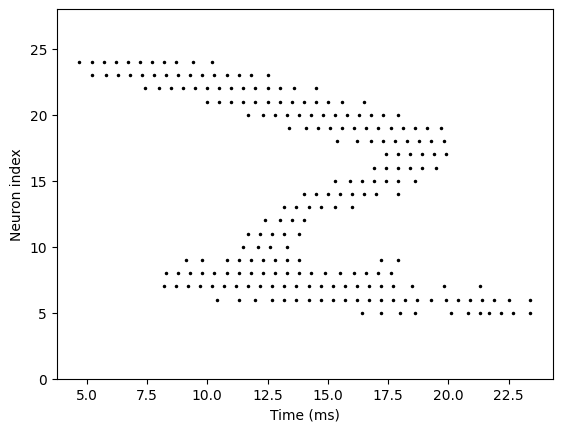

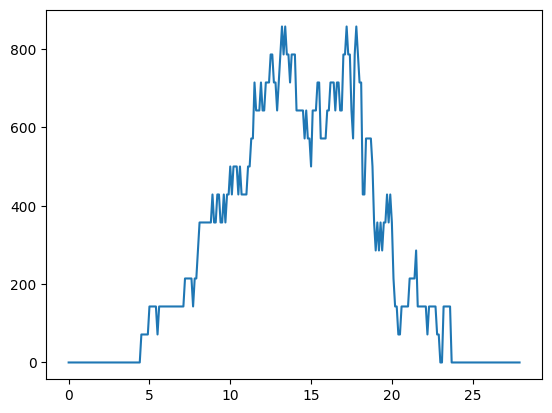

In [341]:
start_scope()
from matplotlib.image import imread
img = image.T
num_samples, N = img.shape
ta = TimedArray(img, dt=1*ms) # 228

A = 1.5
tau = 2*ms

taum = 10*ms
Ee = 0
vt = -54
vr = -60
El = -74
taue = 5*ms


#Add
input_indices = array([0, 1, 0, 1, 1, 0,
                       0, 1, 0, 1, 1, 0])
input_times = array([ 500,  550, 1000, 1010, 1500, 1510,
                     3500, 3550, 4000, 4010, 4500, 4510])*ms
spike_input = SpikeGeneratorGroup(2, input_indices, input_times)



eqs = '''
        dv/dt = (ge * (Ee-vr) + ta(t, i) - v) / taum : 1
        dge/dt = -ge / taue                          : 1
        dgi/dt = -gi / taue                          : 1
      '''

G = NeuronGroup(N, eqs, threshold='v>10', reset='v=0', method='euler')



#Add
synapse = Synapses(spike_input, neurons,
                   model='''s: 1''',
                   on_pre='v += s')
synapse.connect(i=[0, 1], j=[0, 1])
synapse.s = 10000
synapse.connect(i=[0, 1], j=[0, 1])




Mlfp = StateMonitor(G,'v',record=True)

LFP = PopulationRateMonitor(G)

M = SpikeMonitor(G)

run(num_samples*ms)


plot(M.t/ms, M.i, '.k', ms=3)
ylim(0, N)
xlabel('Time (ms)')
ylabel('Neuron index')
plt.show()
plot(LFP.t/ms, LFP.smooth_rate(window='flat', width=0.5*ms)/Hz)